In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('all_data.csv')

In [3]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
data.columns = ['Country', 'Year', 'Life_expectancy', 'GDP']

In [6]:
data.GDP = data.GDP/1000000000

In [7]:
data.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


In [8]:
print(f'There are {data.Country.nunique()} countries in the sample and these are as follows: {data.Country.unique()}')

There are 6 countries in the sample and these are as follows: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [9]:
data.Country.replace('United States of America', 'USA', inplace=True)

In [10]:
#print(f'There are are {data.Country.nunique()} countries and these are as follows: {data.Country.unique()}')

In [11]:
print(f'The analysis starts from {np.min(data.Year)} and ends at {np.max(data.Year)}, which means the dataset including {data.Year.nunique()} consecutive years of GDP and Life expectancy data.')

The analysis starts from 2000 and ends at 2015, which means the dataset including 16 consecutive years of GDP and Life expectancy data.


In [12]:
print(data.GDP.head())

0    77.860932
1    70.979924
2    69.736811
3    75.643460
4    99.210393
Name: GDP, dtype: float64


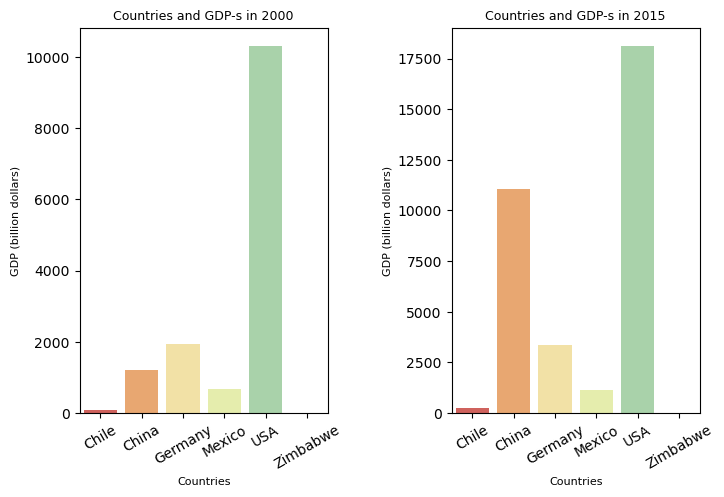

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=[8,5])
plt.subplot(1,2,1)
sns.barplot(x='Country', y='GDP', data=data[data.Year == 2000], palette='Spectral')
plt.title('Countries and GDP-s in 2000', fontsize=9)
plt.xticks(rotation=30)
plt.xlabel('Countries', fontsize=8)
plt.ylabel('GDP (billion dollars)', fontsize=8)
plt.subplot(1,2,2)
sns.barplot(x='Country', y='GDP', data=data[data.Year == 2015], palette='Spectral')
plt.title('Countries and GDP-s in 2015', fontsize=9)
plt.xticks(rotation=30)
plt.xlabel('Countries', fontsize=8)
plt.ylabel('GDP (billion dollars)', fontsize=8)
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.clf()

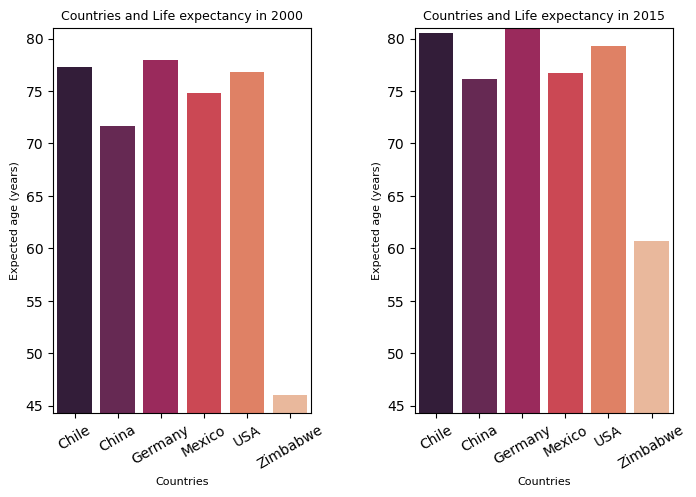

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=[8,5])
plt.subplot(1,2,1)
sns.barplot(x='Country', y='Life_expectancy', data=data[data.Year == 2000], palette='rocket')
plt.title('Countries and Life expectancy in 2000', fontsize=9)
plt.xticks(rotation=30)
plt.xlabel('Countries', fontsize=8)
plt.ylabel('Expected age (years)', fontsize=8)
plt.ylim([np.min(data.Life_expectancy), np.max(data.Life_expectancy)])
plt.subplot(1,2,2)
sns.barplot(x='Country', y='Life_expectancy', data=data[data.Year == 2015], palette='rocket')
plt.title('Countries and Life expectancy in 2015', fontsize=9)
plt.xticks(rotation=30)
plt.xlabel('Countries', fontsize=8)
plt.ylabel('Expected age (years)', fontsize=8)
plt.ylim([np.min(data.Life_expectancy), np.max(data.Life_expectancy)])
plt.subplots_adjust(wspace=0.4)
plt.show()
plt.clf()

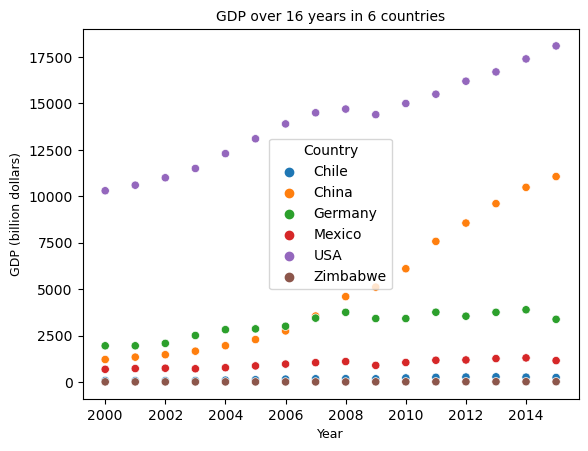

<Figure size 640x480 with 0 Axes>

In [15]:
sns.scatterplot(x='Year', y='GDP', hue='Country', data=data)
plt.title(f'GDP over {data.Year.nunique()} years in {data.Country.nunique()} countries', fontsize=10)
plt.xlabel('Year', fontsize=9)
plt.ylabel('GDP (billion dollars)', fontsize=9)
plt.show()
plt.clf()

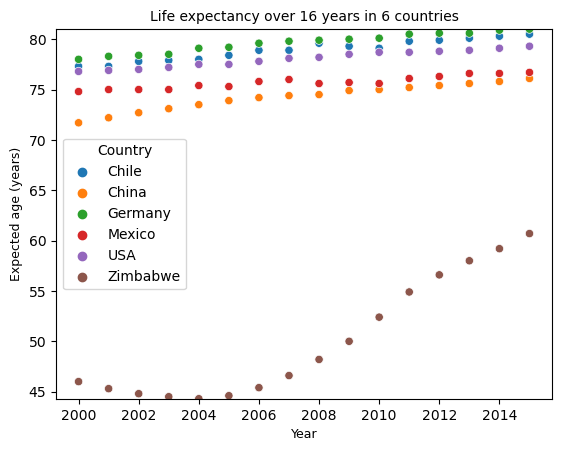

<Figure size 640x480 with 0 Axes>

In [16]:
sns.scatterplot(x='Year', y='Life_expectancy', hue='Country', data=data)
plt.title(f'Life expectancy over {data.Year.nunique()} years in {data.Country.nunique()} countries', fontsize=10)
plt.xlabel('Year', fontsize=9)
plt.ylabel('Expected age (years)', fontsize=9)
plt.ylim([np.min(data.Life_expectancy), np.max(data.Life_expectancy)])
plt.show()
plt.clf()

In [17]:
filt_chile = data[data.Country == 'Chile']
filt_china = data[data.Country == 'China']
filt_ger = data[data.Country == 'Germany']
filt_mex = data[data.Country == 'Mexico']
filt_usa = data[data.Country == 'USA']
filt_zimb = data[data.Country == 'Zimbabwe']

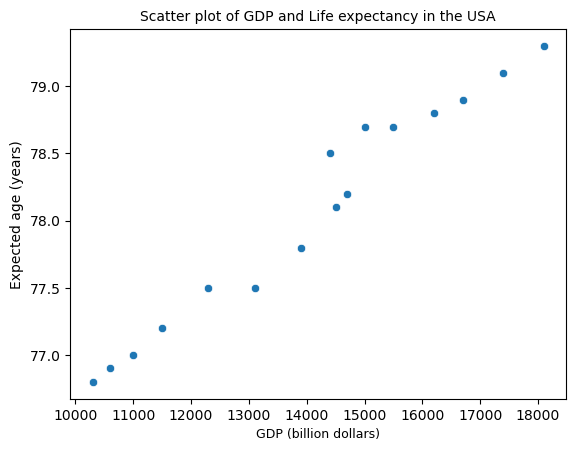

In [18]:
sns.scatterplot(x='GDP', y='Life_expectancy', data=filt_usa)
plt.title('Scatter plot of GDP and Life expectancy in the USA', fontsize=10)
plt.xlabel('GDP (billion dollars)', fontsize=9)
plt.ylabel('Expected age (years)')
plt.show()

In [19]:
corr1, r1 = pearsonr(filt_usa.GDP, filt_usa.Life_expectancy)

In [20]:
print(f'''There is a strong positive relationship between the GDP and Life expectancy in the USA according to this plot.
The correlation quotient is {corr1}.''')

There is a strong positive relationship between the GDP and Life expectancy in the USA according to this plot.
The correlation quotient is 0.9817092382430257.


In [21]:
corr_all, r_all = pearsonr(data.GDP, data.Life_expectancy)

In [22]:
print(f'''If we analyse the 6 countries there is also a positive linear relationship between the GDP and Life expectancy,
because the correlation quotient is {corr_all}.''')

If we analyse the 6 countries there is also a positive linear relationship between the GDP and Life expectancy,
because the correlation quotient is 0.34320674844915594.


In [23]:
np.mean(filt_chile.Life_expectancy)


78.94375

In [24]:
np.mean(filt_china.Life_expectancy)

74.26249999999999

In [25]:
np.mean(filt_ger.Life_expectancy)

79.65625

In [26]:
np.mean(filt_mex.Life_expectancy)

75.71875

In [27]:
np.mean(filt_usa.Life_expectancy)

78.0625

In [28]:
np.mean(filt_zimb.Life_expectancy)

50.09375

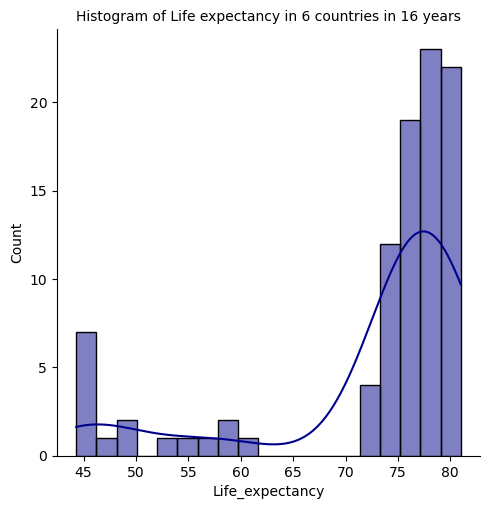

<Figure size 640x480 with 0 Axes>

In [29]:
sns.displot(data.Life_expectancy, kde=True, color='darkblue')
plt.title(f'Histogram of Life expectancy in {data.Country.nunique()} countries in {data.Year.nunique()} years', fontsize = 10)
plt.show()
plt.clf()

In [31]:
print('''Conclusions:
      
1. There is a positive relationship between GDP and Life expectancy of one country, meaning that
if the annual GDP grows, the expected age at birth will be also increasing regardless the country is
developed or developing.
2. The average expected ages are very close to each other of every nations in the sample except Zimbabwe.
3. Both the annual GDP and the Life expectancy have been increased during the overall period under examination.
4. There are 2 significant increasings in the sample. The first is the GDP of China, the second
is the Life expectancy in Zimbabwe. The relatively big raising is obvious in the charts.''')

Conclusions:
      
1. There is a positive relationship between GDP and Life expectancy of one country, meaning that
if the annual GDP grows, the expected age at birth will be also increasing regardless the country is
developed or developing.
2. The average expected ages are very close to each other of every nations in the sample except Zimbabwe.
3. Both the annual GDP and the Life expectancy have been increased during the overall period under examination.
4. There are 2 significant increasings in the sample. The first is the GDP of China, the second
is the Life expectancy in Zimbabwe. The relatively big raising is obvious in the charts.
